# LOGISTIC REGRESSION AS A NEURAL NETWORK


# Binary Classification

---


let's suppose we have an input of an image of 64 by 64-

We want to output a label to recognize this image as either being a cat, in which case our output is 1, or not-cat in which case our output is 0, and we're going to use 'y' to denote the output label.

To store an color image our computer stores three separate matrices corresponding to the red, green, and blue color channels of the image.

So if our input image is 64 pixels by 64 pixels, then we would have 3, 64 by 64 matrices corresponding to the red, green and blue pixel intensity values for our images.

![alt text](https://forums.fast.ai/uploads/default/original/2X/0/0d44d6a8261812a76e77abfe0403bb6d70876009.png)

**[Fig.1]**

So to turn these pixel intensity values into a feature vector, we'll unroll all of these pixel values into an input feature vector '$x$'. So to unroll all these pixel intensity values into Feature vector, we're going to define a feature vector '$x$' corresponding to this image. We're just going to take all the pixel values until we've listed all the red pixels. And we'll keep taking the pixel values until we get a long feature vector listing out all the red, green and blue pixel intensity values of this image.

Here we've shown the conversion of 3D matrix to 1D matrix using a 7 by 5 by 3 image. Where the height and the width of the image is represented by 7 and 5 pixels respectively and being a colour image it has 3 layers of RGB values which is shown in Fig.1

>$x =
 \begin{pmatrix}
  253\\
  144\\
  \vdots\\
  74\\
  \vdots\\
  14\\
  125\\
  \vdots\\
  196\\
  \vdots\\
  165\\
  187\\
  \vdots\\
  218
 \end{pmatrix}$

If this image is a 64 by 64 image, the total dimension of this vector '$x$' will be 64 by 64 by 3 because that's the total numbers we have in all of these matrixes. Which in this case, turns out to be 12,288, that's what we get if we multiply all those numbers. And so we're going to use '$n_{x}$'=12288 to represent the dimension of the input features '$x$'.

$n_{x} = 64*64*3 = 12288$

So in binary classification, our goal is to learn a classifier that can input an image represented by this feature vector '$x$' and predict whether the corresponding label '$y$' is 1 or 0, that is, whether this is a cat image or a non-cat image.

#### Notations:

* A single training example is represented by a pair, $(x,y)$ where $x$ is an $x$-dimensional feature vector and $y$, the label, is either 0 or 1.
* Our training set will be represented by '$m$' or '$M_{train}$'. '$m$' training examples : $(x^1, y^1), (x^2, y^2),.........(x^m, y^m) $.
* Finally, to output all of the training examples into a more compact notation, we're going to define a matrix($X$).
>$X =
 \begin{pmatrix}
  \vdots  & \vdots  & \vdots & \vdots \\
  x^1 & x^2 &\cdots & x^m\\
  \vdots  & \vdots  & \vdots & \vdots \\
 \end{pmatrix}$
 
 where the width of the matrix is represented by '$m$' training examples and the height of the matrix is represented by '$n_{x}$'. So in python **x.shape** = ($n_{x}, m$)
* For the output labels '$Y$',' it turns out that to make our implementation of a neural network easier, it would be convenient to also stack '$Y$'' in columns.
>$Y =
 \begin{pmatrix}
  y^1 & y^2 &\cdots & y^m\\
 \end{pmatrix}$
 
 So '$Y$' here is an $1/m$ dimensional matrix. And again, to use the notation without the shape of Y will be 1, m. Which just means this is a 1 by m matrix. So in python **y.shape** = ($1, m$)







# Logistic Regression

---


This is a learning algorithm that we use when the output labels '$Y$'' in a supervised learning problem are all either 0 or 1, so for binary classification problems

Let's say given an i/p feature vector $x$ corresponding to an image that we want to recognise whether it is a cat picture or not. We want an algorithm that can o/p the prediction ($\hat{y}$) and say the probability of $y = 1$ given i/p feature $x$.

So, $\hat{y} = P(y = 1|x)$

In one word if '$x$' is a picture of cat then '$\hat{y}$' will tell us whether the picture is of a cat or not.

So as we've said earlier '$x$' is a dimensional feature vector and '$w$' and '$b$' are the parameters of Logistic Regression where '$w$' is an '$x$' dimensional feature vector and '$b$' is a real number.

'$w$' is known as Weight and '$b$' is known as Bias Term.

So the output $\hat{y}$ can be written as,  $\hat{y} = (w^T*x + b)$.

But this is an logistic regression used for binary classification so, $0\leq \hat{y} \leq 1$. But using above equation the value of '$\hat{y}$' may be $\gg$ 1. So we use *'sigmoid function'*.

Rewriting the o/p using sigmoid function, $\hat{y} = \sigma(w^T*x + b)\tag{1}$.

Equation of **Sigmoid Function** is $\sigma{(z)} = \frac{1}{1 + \mathrm{e}^{-z}}\tag{2}$

Sigmoid Function looks like -

![alt text](https://i0.wp.com/www.stokastik.in/wp-content/uploads/2017/07/sigmoid.png?resize=400%2C300)


#### Defining sigmoid function in Python:

In [ ]:
import numpy as np
def sigmoid(z):
  s = 1/(1+np.exp(-z))
  return s

In [ ]:
x = np.array([100, -100])
sigmoid(x)

array([1.00000000e+00, 3.72007598e-44])

#### Observing the output of the sigmoid function using different values of $z$:

#### Sigmoid gradient
We need to compute gradients to optimize loss functions using backpropagation.

Now implementing the function sigmoid_grad() to compute the gradient of the sigmoid function with respect to its input x. The formula is: $sigmoid\_derivative(x) = \sigma'(x) = \sigma(x) (1 - \sigma(x))\tag{3}$


In [ ]:
def sigmoid_derivative(x):
    s = 1/(1+np.exp(-x))
    ds = s*(1-s)
    
    return ds

In [ ]:
x = np.array([1, 2, 3])
print ("sigmoid_derivative(x) = " + str(sigmoid_derivative(x)))

sigmoid_derivative(x) = [0.19661193 0.10499359 0.04517666]


To learn parameters for our model we're given a training set of m training examples ${(x^1, y^1),......(x^m, y^m)}$ and we want to find parameters $W$ and $B$ so that at least on the training set, the outputs we have($\hat{y}$) will be close to the ground truth labels ($y^i$) that we got in the training set.

## Loss Function:
It measure how well our model is doing in a single training example. Usually we use squared error loss function which looks like $L(\hat{y}, y) = \frac{1}{2}(\hat{y}-y)^2\tag{4}$ which doesnot optimize gradiant descent so well. 

So for Logistic Regression, we use a different error function, named Crossentropy loss, $L(\hat{y}, y) = -[ylog\hat{y}+(1-y)log(1-\hat{y})]\tag{5}$.
* If $y = 1$ $\hat{y}$ will be large.
* If $y = 0$ $\hat{y}$ will be small.

## Cost Function:
It measure how well our model is doing in the entire training example.

Cost function looks like,

$J(w,b) = \frac{1}{m}\sum_{i=i}^{m}L(\hat{y}^i, y^i)\tag{6}$

or, $J(w,b) =\frac{1}{m}\sum_{i=i}^{m}[y^ilog\hat{y}^i+(1-y^i)log(1-\hat{y}^i)]\tag{7}$

While training the logistic regresion model we'll try to calculate $w$ & $b$ so that the cost function $J$ can be minimized.


## Gradinat Descent:
It is used to train the parameter $w$ and $b$ on our training set so that the cost function $J(w,b)$ will be minimized.

The cost function $J(w,b)$ is a convex function. The $w$ & $b$ is in horizontal plane and the cost function $J(w,b)$ is in vertical plane.

![alt text](https://miro.medium.com/max/872/0*JHD5ObJvzSxxCqCu)

For easier understanding of the working of Gradiant Descent we've considered a 2D plot of $J$ and $w$ -

![alt text](https://sebastianraschka.com/images/blog/2015/singlelayer_neural_networks_files/perceptron_gradient_descent_1.png)

To train the parameters we have to randomly take any values for the parameters. For logistic regression we initialize 'w' and 'b' by 0. Gradiant descent takes the point where the value is in the graph and take it one step down and finally bring it to the minimum($J_{min}(W)$) which is known as **Global Optimum**.

An algorithm for Gradiant Descent $w: = w - \alpha \frac{\delta J(w)}{\delta w}$, 
where 
* $w:$ is the next updated value of $w$ after permforming Gradiant Descent.
* '$\alpha$' is known as Learning Rate, 
* $\frac{\delta J(w)}{\delta w}$ is also represented as '$\delta w$'.

so the equation can be written as $w: = w -\alpha \delta w$.

Now '$\delta w$' is the slope of the function of the point. At the initial point the derivative is +ve so the to obtain $w:$ the $\alpha \delta w$ term gets substracted from $w$.

So for both parameters '$w$' and '$b$' the algorithm can be written as,
$w: = w - \alpha \frac{\delta J(w, b)}{\delta w}\tag{8}$
$b: = b - \alpha \frac{\delta J(w, b)}{\delta b}\tag{9}$






## General Architecture of the learning algorithm
![alt text](https://ask.qcloudimg.com/http-save/yehe-781483/fg03pr1cuo.jpeg?imageView2/2/w/1620)

## Logistic Regression using Computational Graph

Understanding Logistic Regression using computational graph will make a bit more sense when we talk about full-fledged neural networks.
![alt text](https://miro.medium.com/max/1400/1*1E9fW_LIXpGoQYQcaSkzZQ.png)

## Vectorization:
* For logistic regression we calculate the prediction($\hat{y}$) using sigmoid function ($\sigma(z)$). So $\hat{y} = \sigma (z)$ where $z = w^Tx + b$.
* Then we calculate the loss function  $L(\hat{y}, y) = -[ylog\hat{y}+(1-y)log(1-\hat{y})]$

For these calculation we need to use for loops for calculating each parameter of logistic regression mentioned here. Use of 'for loop' make programming unefficient so to efficiently code our neural netowork we use **Vectorization**.

In [ ]:
import time
import numpy as np
a = np.random.rand(10000000)
b = np.random.rand(10000000)

#### Classical Method:

In [ ]:
output = 0
start_time = time.time()
for i in range(10000000):
  output += a[i]*b[i]
end_time = time.time()
print(output)
print("Time taken to calculate is " + str(1000*(end_time - start_time)) + " ms")

2500057.1236310075
Time taken to calculate is 4067.5551891326904 ms


#### After Vectorization:

In [ ]:
start_time = time.time()
output = np.dot(a,b)
end_time = time.time()

print(output)
print("Time taken to calculate is " + str(1000*(end_time - start_time)) + " ms")

2499947.778014361
Time taken to calculate is 21.017074584960938 ms


As we can see the non-vectorized version is taking much time than the vectorized version.

## Broadcasting in python:
A very important concept to understand in numpy is "broadcasting". It is very useful for performing mathematical operations between arrays of different shapes.

Below the number of calories from carbohydrates, proteins, and fats in 100 grams of four different foods are shown-

>Nutrients | Apple | Beef | Egg | Potato
>--- | --- | --- | --- | ---
>Carb | 56.0 | 0.0 | 4.4 | 68.0
>Protein | 1.2 | 104.0 | 52.0 | 8.0
>Fat | 1.8 | 135.0 | 99.0 | 0.9

To calculate the percentage of calories from carbs, proteins and fats for each of the four foods, we'll do the following,

In [ ]:
import numpy as np
food = np.array([[56.0, 0.0, 4.4, 68.0],
                 [1.2, 104.0, 52.0, 8.0],
                 [1.8, 135.0, 99.0, 0.9]])
print(food)
print()

calories = food.sum(axis = 0) # we want to sum vertiaclly so 'axis = 0' & if horizontally then 'axis = 1'
percentage = (food/calories)*100
print("The percentage of calories from carbs, proteins and fats for each of the four foods are-")
print(percentage)

[[ 56.    0.    4.4  68. ]
 [  1.2 104.   52.    8. ]
 [  1.8 135.   99.    0.9]]

The percentage of calories from carbs, proteins and fats for each of the four foods are-
[[94.91525424  0.          2.83140283 88.42652796]
 [ 2.03389831 43.51464435 33.46203346 10.40312094]
 [ 3.05084746 56.48535565 63.70656371  1.17035111]]


### Softmax
Implementing a softmax function using numpy. We can think of softmax as a normalizing function used when our algorithm needs to classify two or more classes.

**Instructions**:
- $ \text{for } x \in \mathbb{R}^{1\times n} \text{,     } softmax(x) = softmax(\begin{bmatrix}
    x_1  &&
    x_2 &&
    ...  &&
    x_n  
\end{bmatrix}) = \begin{bmatrix}
     \frac{e^{x_1}}{\sum_{j}e^{x_j}}  &&
    \frac{e^{x_2}}{\sum_{j}e^{x_j}}  &&
    ...  &&
    \frac{e^{x_n}}{\sum_{j}e^{x_j}} 
\end{bmatrix} $ 

- $\text{for a matrix } x \in \mathbb{R}^{m \times n} \text{,  $x_{ij}$ maps to the element in the $i^{th}$ row and $j^{th}$ column of $x$, thus we have: }$  $$softmax(x) = softmax\begin{bmatrix}
    x_{11} & x_{12} & x_{13} & \dots  & x_{1n} \\
    x_{21} & x_{22} & x_{23} & \dots  & x_{2n} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{m1} & x_{m2} & x_{m3} & \dots  & x_{mn}
\end{bmatrix} = \begin{bmatrix}
    \frac{e^{x_{11}}}{\sum_{j}e^{x_{1j}}} & \frac{e^{x_{12}}}{\sum_{j}e^{x_{1j}}} & \frac{e^{x_{13}}}{\sum_{j}e^{x_{1j}}} & \dots  & \frac{e^{x_{1n}}}{\sum_{j}e^{x_{1j}}} \\
    \frac{e^{x_{21}}}{\sum_{j}e^{x_{2j}}} & \frac{e^{x_{22}}}{\sum_{j}e^{x_{2j}}} & \frac{e^{x_{23}}}{\sum_{j}e^{x_{2j}}} & \dots  & \frac{e^{x_{2n}}}{\sum_{j}e^{x_{2j}}} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    \frac{e^{x_{m1}}}{\sum_{j}e^{x_{mj}}} & \frac{e^{x_{m2}}}{\sum_{j}e^{x_{mj}}} & \frac{e^{x_{m3}}}{\sum_{j}e^{x_{mj}}} & \dots  & \frac{e^{x_{mn}}}{\sum_{j}e^{x_{mj}}}
\end{bmatrix} = \begin{pmatrix}
    softmax\text{(first row of x)}  \\
    softmax\text{(second row of x)} \\
    ...  \\
    softmax\text{(last row of x)} \\
\end{pmatrix} $$

In [ ]:
def softmax(x):
    # Apply exp() element-wise to x. Use np.exp(...).
    x_exp = np.exp(x)

    # Create a vector x_sum that sums each row of x_exp. Use np.sum(..., axis = 1, keepdims = True).
    x_sum = np.sum(x_exp,axis = 1,keepdims = True)
    
    # Compute softmax(x) by dividing x_exp by x_sum. It should automatically use numpy broadcasting.
    s = x_exp / x_sum
    
    return s

In [ ]:
x = np.array([
    [9, 2, 5, 0, 0],
    [7, 5, 0, 0 ,0]])
print("softmax(x) = " + str(softmax(x)))

softmax(x) = [[9.80897665e-01 8.94462891e-04 1.79657674e-02 1.21052389e-04
  1.21052389e-04]
 [8.78679856e-01 1.18916387e-01 8.01252314e-04 8.01252314e-04
  8.01252314e-04]]


# Logistic Regression with a Neural Network Python Programming

---








## Importing libaries and Packages

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train_catvnoncat.h5 to train_catvnoncat.h5
Saving test_catvnoncat.h5 to test_catvnoncat.h5


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline

## Loading the dataset

In [ ]:
def load_dataset():
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [ ]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

## Exploring the dataset

y = [1], it's a 'cat' picture.


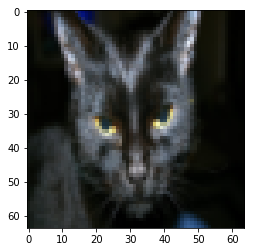

In [ ]:
# Example of a picture
index = 25
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

Many software bugs in deep learning come from having matrix/vector dimensions that don't fit. If we can keep our matrix/vector dimensions straight we will go a long way toward eliminating many bugs.

So finding the values for:

- m_train (number of training examples)
- m_test (number of test examples)
- num_px (= height = width of a training image)

>*`train_set_x_orig` is a numpy-array of shape (m_train, num_px, num_px, 3). For instance, you can access m_train by writing `train_set_x_orig.shape[0]`.*

In [ ]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[2]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


## Data preprocessing

### Reshaping the training examples and test examples
Converting the 3-D matrix to 1-D matrix.

In [ ]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


### Standardizing the dataset
To represent color images, the red, green and blue channels (RGB) must be specified for each pixel, and so the pixel value is actually a vector of three numbers ranging from 0 to 255.

One common preprocessing step in machine learning is to center and standardize your dataset, meaning that you substract the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole numpy array. But for picture datasets, it is simpler and more convenient and works almost as well to just divide every row of the dataset by 255 (the maximum value of a pixel channel).

In [ ]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

## Building the parts of our algorithm

### Building the sigmoid function
We need to compute $sigmoid(w^T.x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$ to make predictions.

In [ ]:
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

In [ ]:
sigmoid(np.array([100, -100]))

array([1.00000000e+00, 3.72007598e-44])

### Initializing parameters
You have to initialize 'w' and 'b' as a vector of zeros.

In [ ]:
def initialize_with_zeros(dim):
    w = np.zeros(shape = (dim, 1), dtype = np.float32)
    b = 0
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    return w, b

In [ ]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


### Forward and Backward propagation
Now that our parameters are initialized, we can do the "forward" and "backward" propagation steps for learning the parameters.

Forward Propagation:
- We get X
- We compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- We calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Here are the two formulas we will be using: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In the cell below, we're implementing-
* Arguments :
 * w -- weights, a numpy array of size (num_px * num_px * 3, 1)
 * b -- bias, a scalar
 * X -- data of size (num_px * num_px * 3, number of examples)
 * Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)
* Returns :
 * cost -- negative log-likelihood cost for logistic regression
 * dw -- gradient of the loss with respect to w, thus same shape as w
 * db -- gradient of the loss with respect to b, thus same shape as b

In [ ]:
def propagate(w, b, X, Y):
    m = X.shape[1]

    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T, X) + b)                                              # computes activation
    cost = (-1. / m) * np.sum((Y*np.log(A) + (1 - Y)*np.log(1-A)), axis=1)       # computes cost
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1./m)*np.dot(X, ((A-Y).T))
    db = (1./m)*np.sum(A-Y, axis = 1)

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [ ]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = [0.00145558]
cost = 5.801545319394553


### Optimization
- We have initialized your parameters.
- We are also able to compute a cost function and its gradient.
- Now, We want to update the parameters using gradient descent.

The goal is to learn $w$ and $b$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

In the cell below, we're implementing -     
* Arguments:
   * w -- weights, a numpy array of size (num_px * num_px * 3, 1)
   * b -- bias, a scalar
   * X -- data of shape (num_px * num_px * 3, number of examples)
   * Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
   * num_iterations -- number of iterations of the optimization loop
   * learning_rate -- learning rate of the gradient descent update rule
   * print_cost -- True to print the loss every 100 steps
    
* Returns:
   * params -- dictionary containing the weights w and bias b
   * grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
   * costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.

In [ ]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False): 
  costs = []
  for i in range(num_iterations):

      # Cost and gradient calculation
      grads, cost = propagate(w=w, b=b, X=X, Y=Y)

      # Retrieving derivatives from grads
      dw = grads["dw"]
      db = grads["db"]

      # Implementing update rule
      w = w-learning_rate*dw
      b = b-learning_rate*db

      # Record the costs
      if i % 100 == 0:
        costs.append(cost)

      # Printing the cost every 100 training iterations
      if print_cost and i % 100 == 0:
          print ("Cost after iteration %i: %f" %(i, cost))

  params = {"w": w,
            "b": b}

  grads = {"dw": dw,
           "db": db}

  return params, grads, costs

In [ ]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.19033591]
 [0.12259159]]
b = [1.92535983]
dw = [[0.67752042]
 [1.41625495]]
db = [0.2191945]


### Prediction
The previous function will output the learned 'w' and 'b'. We are able to use 'w' and 'b' to predict the labels for a dataset X. Implementing the `predict()` function. There are two steps to computing predictions:

1. Calculating $\hat{Y} = A = \sigma(w^T X + b)$

2. Converting the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector `Y_prediction`.

In the cell below, we're implementing-
* Arguments:
    * w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    * b -- bias, a scalar
    * X -- data of size (num_px * num_px * 3, number of examples)
    
* Returns:
    * Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X

In [ ]:
def predict(w, b, X):    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Computing vector "A" predicting the probabilities of a cat being present in the picture
    A = sigmoid(np.dot((w.T), X)+b)
    
    for i in range(A.shape[1]):
        
        # Converting probabilities A[0,i] to actual predictions p[0,i]
        if A[0, i] > 0.5:
            Y_prediction[0, i] = 1
        else :
            Y_prediction[0, i] = 0
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [ ]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


## Merging all functions into the logistic regression model
We will now see how the overall model is structured by putting together all the functions implemented in the previous parts together, in the right order.

Implementing the model function using the following notation:

- Y_prediction_test for our predictions on the test set
- Y_prediction_train for our predictions on the train set
- w, costs, grads for the outputs of optimize()

In the cell below, we're implementing-
* Arguments:
    * X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    * Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    * X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    * Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    * num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    * learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    * print_cost -- Set to true to print the cost every 100 iterations
    
* Returns:
    * d -- dictionary containing information about the model.

In [ ]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
  
    # initializing parameters with zeros
    w, b = initialize_with_zeros(X_train.shape[0])
    
    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieving parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predicting test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Printing train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [ ]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


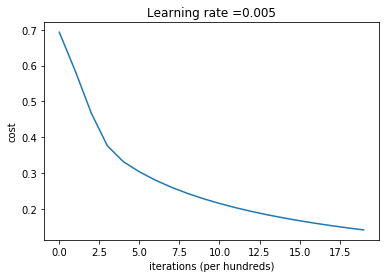

In [ ]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()